In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

## Функция отрисовки

In [2]:
def check_statistics(statistics):
    if len(statistics) >= 2:
        st_keys = sorted(list(statistics.keys()))
        n = len(statistics[st_keys[-1]]['colors'])
        for i in range(1, len(statistics)+1):
            res = 0
            for j in range(n):
                if (statistics[st_keys[-1]]['colors'][j] == statistics[st_keys[-1*i]]['colors'][j]):
                    res += 1
            if n == res:        
                return True
    return False


In [3]:
def draw(graph, colors, i=0):
    pos = nx.circular_layout(graph)
    plt.figure(i, figsize=(5, 5))
    nx.draw(graph,
            pos,
            node_color='orange',
            node_size=400,
            with_labels=True)
    colored_nodes = np.where(colors == 1)[0]
    if len(colored_nodes) > 0:
        nx.draw_networkx_nodes(graph,
                               pos,
                               nodelist=colored_nodes,
                               node_size=400,
                               alpha=0.7,
                               linewidths=4,
                               node_color="red")

## Функция изменения

In [4]:
# colors -начальная цветовое распределение, draw_process - иллюстрировать процесс
def color_graph(graph, colors, probs, draw_process=False):
    n = len(graph.nodes)
    k = 0   # количество итераций
    black = colors.sum()
    white = colors.size - black
    statistics = {k: {'black': black,
                      'white': white,
                      'colors':colors}}
    while (white != black+white) and (black != black+white) and not check_statistics(statistics):
        if draw_process:
            draw(graph, colors, k)
        k += 1
        colors_next = np.full(n, 0)
        for i in range(n):
            probs_num = 0
            prob = 1
            for j, node in enumerate(graph.edges):
                n1, n2 = node
                if i in [n1, n2] and colors[n1] != colors[n2]:
                    probs_num += 1
                    prob *= probs[j]
            if probs_num > 0:
                colors_next[i] = 1 - colors[i] if prob >= 0.3 else colors[i]
        colors = colors_next
        black = colors.sum()
        white = colors.size - black
        statistics[k] = {'black': black,
                          'white': white,
                          'colors':colors}
    draw(graph, colors, k+1)
    # возвращение статистики
    return statistics


## Создание графа, цветового распределения и вероятностей

In [5]:
n = 49
p = 0.1
while True:
    graph = nx.gnp_random_graph(n, p, seed=random.randint(1, 180))
    if nx.is_connected(graph):
        break
probs = np.random.rand(len(graph.edges))
colors = np.random.randint(0, 2, size=(n))

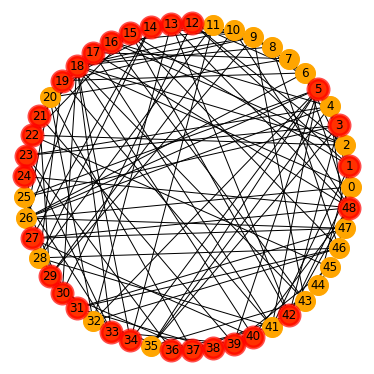

In [6]:
draw(graph, colors)

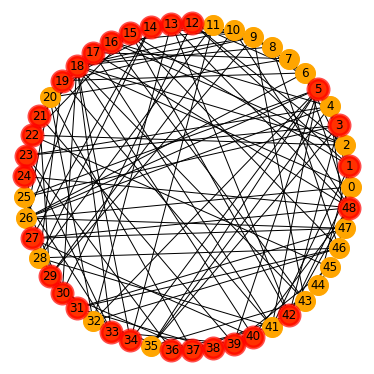

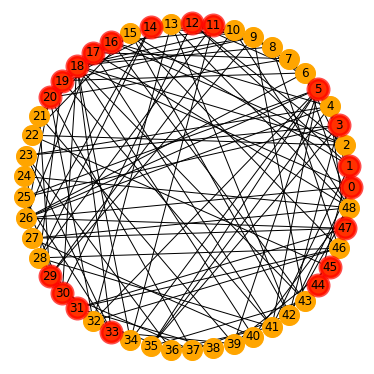

In [7]:
result = color_graph(graph, colors, probs, draw_process=True)

## Визуализация статистики

In [8]:
black = []
white = []
for val in result.values():
    black.append(val['black'])
    white.append(val['white'])


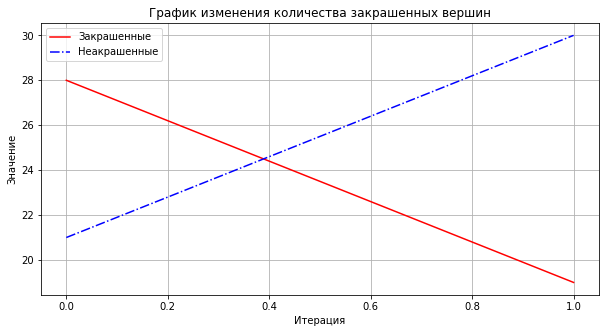

In [9]:
plt.figure(figsize=(10, 5))
plt.xlabel('Итерация')
plt.ylabel('Значение')
plt.title('График изменения количества закрашенных вершин')
plt.grid(True)
plt.plot(result.keys(), black, '-r', label='Закрашенные')
plt.plot(result.keys(), white, '-.b', label='Неакрашенные')
plt.legend(loc='best')
plt.show()


Граф начал мигать 